<a href="https://colab.research.google.com/github/sai-bharghav/pytorch/blob/main/Simple_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a model class that inherits the nn module
class Model(nn.Module):
  # INPUT layer (4 Features of the neuron) ---> Hidden layer1(Some 'n' number of neurons)---> H2(n)-----> Output layer
  def __init__(self,n_features=4,h1=9,h2=6, out_features=3):
    super().__init__() # Instanciate the module
    self.fc1=nn.Linear(n_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x



In [3]:
torch.manual_seed(41) # Pick a manual seed for randomization
# Create a instance of the model
model = Model()


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

In [6]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [7]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
# Change text to numbers at species
my_df['species']=my_df['species'].replace('setosa',0.0)

my_df['species']=my_df['species'].replace('versicolor',1.0)

my_df['species']=my_df['species'].replace('virginica',2.0)

In [11]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [12]:
# Train, test and split on X,y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [13]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [15]:
X= X.values
y=y.values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [18]:
#Convert the arrays into tensor
X_train=torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
# Convert y labels to tensor
y_train= torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
# Set the criterion of the model to measure the error, how far off are the predicions from the data
criterion = nn.CrossEntropyLoss()
# Choose an optimizer (adam), learning rate() (if error doesn't go down after some iteratons(epochs) we lower our learning rate)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [21]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=9, bias=True)
  (fc2): Linear(in_features=9, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=3, bias=True)
)>

In [22]:
# Train our model
# Determine how many epochs we want ( An epoch is one through our data for the model to learn)
epochs = 200
losses =[]
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss, it is gonna high at first
  loss = criterion(y_pred,y_train)# predicted value vs y_train(train value)

  # Keeping track of the loss
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i%10==0:
    print(f'Epoch : {i} and loss : {loss}')

  # Do some backward propogation : Take the loss from the forward layer and feed it back to the network for fine tuning the wieghts
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 and loss : 1.1115785837173462
Epoch : 10 and loss : 0.9775516986846924
Epoch : 20 and loss : 0.7767503261566162
Epoch : 30 and loss : 0.540558397769928
Epoch : 40 and loss : 0.3866439163684845
Epoch : 50 and loss : 0.2835187613964081
Epoch : 60 and loss : 0.1955161988735199
Epoch : 70 and loss : 0.1296447515487671
Epoch : 80 and loss : 0.09007922559976578
Epoch : 90 and loss : 0.06821884214878082
Epoch : 100 and loss : 0.055702559649944305
Epoch : 110 and loss : 0.04790369048714638
Epoch : 120 and loss : 0.04259756579995155
Epoch : 130 and loss : 0.03872418776154518
Epoch : 140 and loss : 0.03572824224829674
Epoch : 150 and loss : 0.03330882266163826
Epoch : 160 and loss : 0.03129389137029648
Epoch : 170 and loss : 0.029576100409030914
Epoch : 180 and loss : 0.02808595634996891
Epoch : 190 and loss : 0.02677469328045845


Text(0.5, 0, 'Epochs')

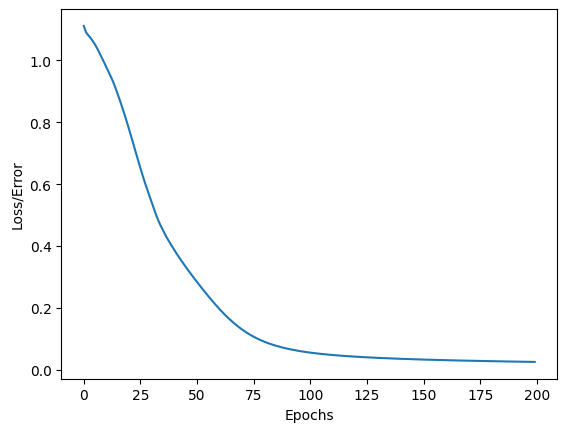

In [23]:
# Graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')